PRN: 123B1B054

**Assignment no.: 4**

**Logistic Regression**

1. Logistic Regression is a supervised machine learning algorithm used for classification problems.

2. Unlike Linear Regression (which predicts continuous values), Logistic Regression predicts categorical outcomes (e.g., Yes/No, Spam/Not Spam, Disease/No Disease).

3. The outcome variable is usually binary (0 or 1), but it can also be extended to multiclass classification.


4. Even though it’s used for classification, the algorithm is called regression because: It uses a linear combination of input features (just like linear regression).

5. Then applies a logistic (sigmoid) function to map results into probabilities between 0 and 1.

🔹 Mathematical Form

For input features

X=(x1,x2,…,xn):


z=β0+β1x1+β2x2+⋯+βnxn
	​


Instead of directly using z, logistic regression applies the sigmoid function:

    P(Y=1|X)=σ(z)=1/1+e^-z
	​

If P>0.5 → predict class 1
IF P≤0.5 → predict class 0


🔹 **Sigmoid (Logistic) Function**

1. Converts any real number into a value between 0 and 1.

2. Shape: S-shaped curve.

3. Useful for probability interpretation.

**🔹 Loss Function**

Logistic regression uses Log Loss (Cross-Entropy Loss):


L=−1/m ∑ [yilog(y^i)+(1−yi)log(1−y^i)]

Ensures model learns to maximize the probability of correct predictions.


**🔹 Types of Logistic Regression**

1. Binary Logistic Regression → Two outcomes (e.g., Pass/Fail).

2. Multinomial Logistic Regression → More than two categories (e.g., Red/Blue/Green).

3. Ordinal Logistic Regression → Ordered categories (e.g., Low/Medium/High).

**Assumptions:**

1. Dependent variable is categorical.

2. Observations are independent.

3. Predictors should not be highly correlated.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/framingham.csv")
df.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
mode_cols = ["education", "BPMeds"]
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
median_cols = ["totChol", "BMI", "heartRate", "glucose", "cigsPerDay"]

for col in median_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
    if df[col].notna().any():
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(0)  # fallback if column is empty


In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
df.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("TenYearCHD", axis=1)   # Independent variables
y = df["TenYearCHD"]                # Dependent variable (target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create logistic regression model
model = LogisticRegression(max_iter=1000)

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8573113207547169
Confusion Matrix:
 [[718   6]
 [115   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



**Decision Tree Model**

**a) What is a Decision Tree?**

A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by splitting the dataset into smaller subsets based on feature values, forming a tree-like structure where:

Each internal node represents a decision on a feature.

Each branch represents the outcome of the decision.

Each leaf node represents the final class or prediction.

**b) How Does It Work?**

The tree is constructed using a top-down, greedy approach:

The algorithm selects the best feature to split the data using metrics like:

Gini Impurity

Entropy (Information Gain)

It continues splitting the data recursively until:

All samples in a node belong to the same class.

A stopping criterion is reached (maximum depth, minimum samples per leaf).

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced', criterion="entropy",ccp_alpha=0.0001)  # class_weight balances minority class

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = dt_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6014150943396226
Confusion Matrix:
 [[429 290]
 [ 48  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.60      0.72       719
           1       0.22      0.63      0.32       129

    accuracy                           0.60       848
   macro avg       0.56      0.61      0.52       848
weighted avg       0.80      0.60      0.66       848



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train an initial tree to get feature importances
initial_tree = DecisionTreeClassifier(random_state=42)
initial_tree.fit(X_train_scaled, y_train)

# Get feature importances
importances = initial_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


            Feature  Importance
12              BMI    0.160206
10            sysBP    0.147702
11            diaBP    0.126375
9           totChol    0.117452
1               age    0.114291
14          glucose    0.104362
13        heartRate    0.102665
4        cigsPerDay    0.050882
2         education    0.037796
0              male    0.015689
3     currentSmoker    0.006021
5            BPMeds    0.005318
6   prevalentStroke    0.004721
8          diabetes    0.004364
7      prevalentHyp    0.002157


In [ ]:
top_features = feature_importance_df['Feature'][:6].tolist()
print("Top features:", top_features)

X_top = X[top_features]

# Split and scale again
X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled_top = scaler.fit_transform(X_train_top)
X_test_scaled_top = scaler.transform(X_test_top)


Top features: ['BMI', 'sysBP', 'diaBP', 'totChol', 'age', 'glucose']


In [ ]:
# Train tree on top features only
dt_model_top = DecisionTreeClassifier(
    max_depth=4, class_weight='balanced', random_state=42, criterion="entropy",ccp_alpha=0.0001
)
dt_model_top.fit(X_train_scaled_top, y_train)

# Predict and evaluate
y_pred_top = dt_model_top.predict(X_test_scaled_top)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_top))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_top))
print("Classification Report:\n", classification_report(y_test, y_pred_top))


Accuracy: 0.6757075471698113
Confusion Matrix:
 [[510 209]
 [ 66  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79       719
           1       0.23      0.49      0.31       129

    accuracy                           0.68       848
   macro avg       0.56      0.60      0.55       848
weighted avg       0.79      0.68      0.72       848



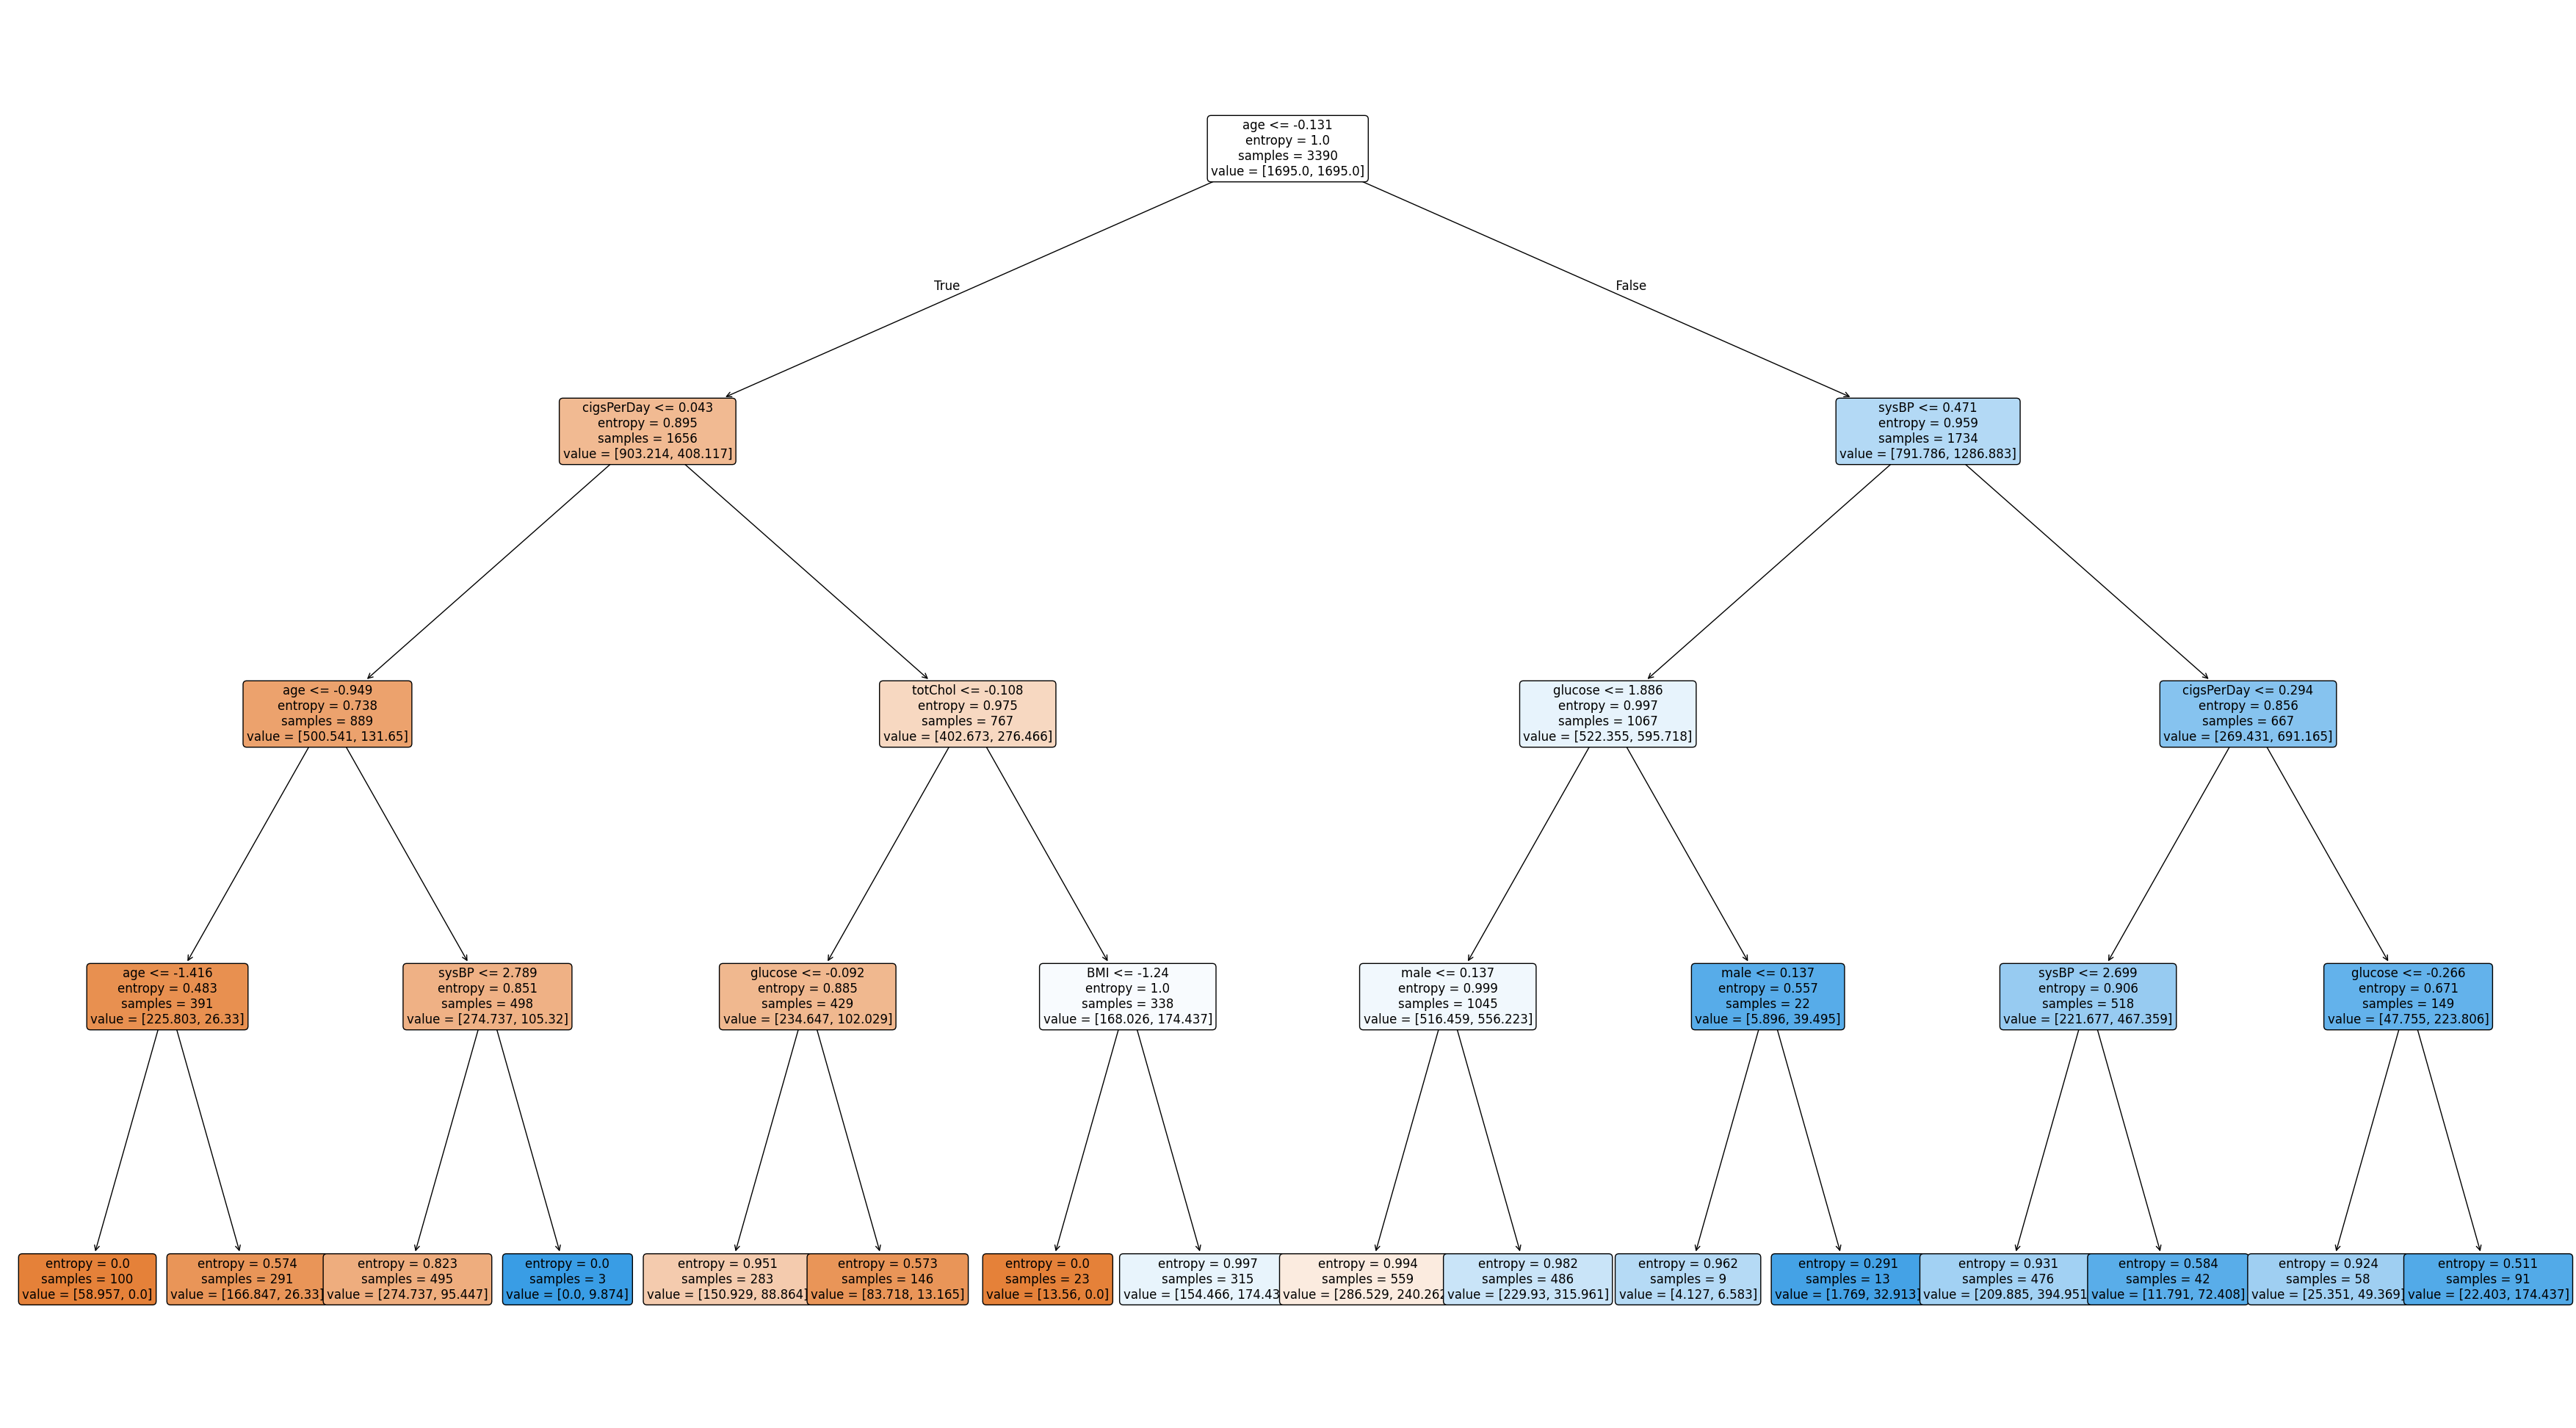

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(45,25))
tree.plot_tree(
    dt_model,
    feature_names=df.columns,      # column names
    filled=True,                   # color nodes
    rounded=True,                  # rounded boxes
    fontsize=12                    # readable text
)
plt.show()


**Conclusion:**

In this assignment, we implemented Logistic regression, Desicion tree and visualized a Decision Tree classifier to understand how it makes predictions. By applying pruning, we simplified the model, reduced overfitting, and improved its interpretability and performance.